# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Problem Statement

* we have been given a dataset that describes the functionality of house. Now, based on the given features, we have to predict the house price.

# Defining the DatFrame

In [ ]:
df = pd.read_csv('/content/Housing.csv')

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# EDA - Exploratory Data Analysis

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.shape[0] # for rows

545

In [ ]:
df.shape[1] # for colums

13

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# checking for unique values
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
# number of null values in each columns
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
# no. of null values in each dataset
df.isnull().sum().sum()

0

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
## price       stregth
## 10             2
## 100            3
## 1000           4
## 10000          5 -->



In [ ]:
# unique values in mainroad
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
# yes--->1
# No---->0
newdf = df.copy()

In [ ]:
newdf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,1,yes,no,yes,2,no,furnished


In [ ]:
# mainroad
df.mainroad.replace(['yes','no'],[1,0], inplace=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished


In [ ]:
df.mainroad.dtypes

dtype('int64')

In [ ]:
df.guestroom.unique()

array([0, 1])

In [ ]:
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [ ]:
# guestroom
df.guestroom.replace(['no','yes'],[0,1], inplace=True)

In [ ]:
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [ ]:
df.guestroom.unique()

array([0, 1])

In [ ]:
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [ ]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.basement.value_counts()

no     354
yes    191
Name: basement, dtype: int64

In [ ]:
# Basement
df.basement.replace(['no','yes'],[0,1], inplace=True)

In [ ]:
df.basement.value_counts()

0    354
1    191
Name: basement, dtype: int64

In [ ]:
# hotwaterheating
df.hotwaterheating.replace(['no','yes'],[0,1], inplace=True)

In [ ]:
# airconditioning
df.airconditioning.replace(['no','yes'],[0,1], inplace=True)

In [ ]:
# prefarea
df.prefarea.replace(['no','yes'],[0,1], inplace=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
# furnishingstatus
df.furnishingstatus.replace(['unfurnished','furnished','semi-furnished'],[0,1,2], inplace=True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


# Observation
  1. Data Strength - 545
  2. number of random variable - 13
  3. None of the column contain vull value
  4. columns - price	area	bedrooms	stories,parking	  has numerical values

  5. columns - mainroad	guestroom	basement	hotwaterheating	airconditioning		prefarea	furnishingstatus has object values

# Manipulation
  1. Changed the Categorical values for the columns(mainroad	guestroom	basement	hotwaterheating	airconditioning	prefarea	furnishingstatus)

In [ ]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [ ]:
# statistics
df.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.190086
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.081367
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.097834
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.089418
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.043288
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.079403
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.057513
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.093425
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.069076
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.020887


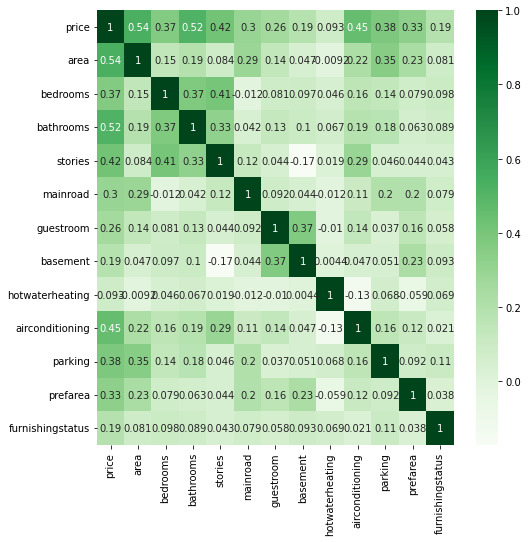

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True , cmap='Greens')

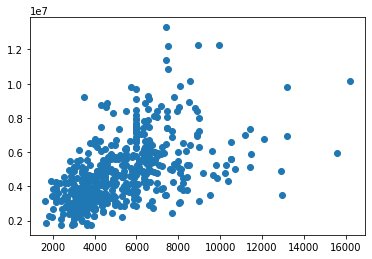

In [ ]:
plt.scatter(df.area, df.price)

In [ ]:
# lets say 
# 16 ft --> Rs.100
#  16.5 ---> Rs.10000
## exactly no , so these are outliers at area 16000

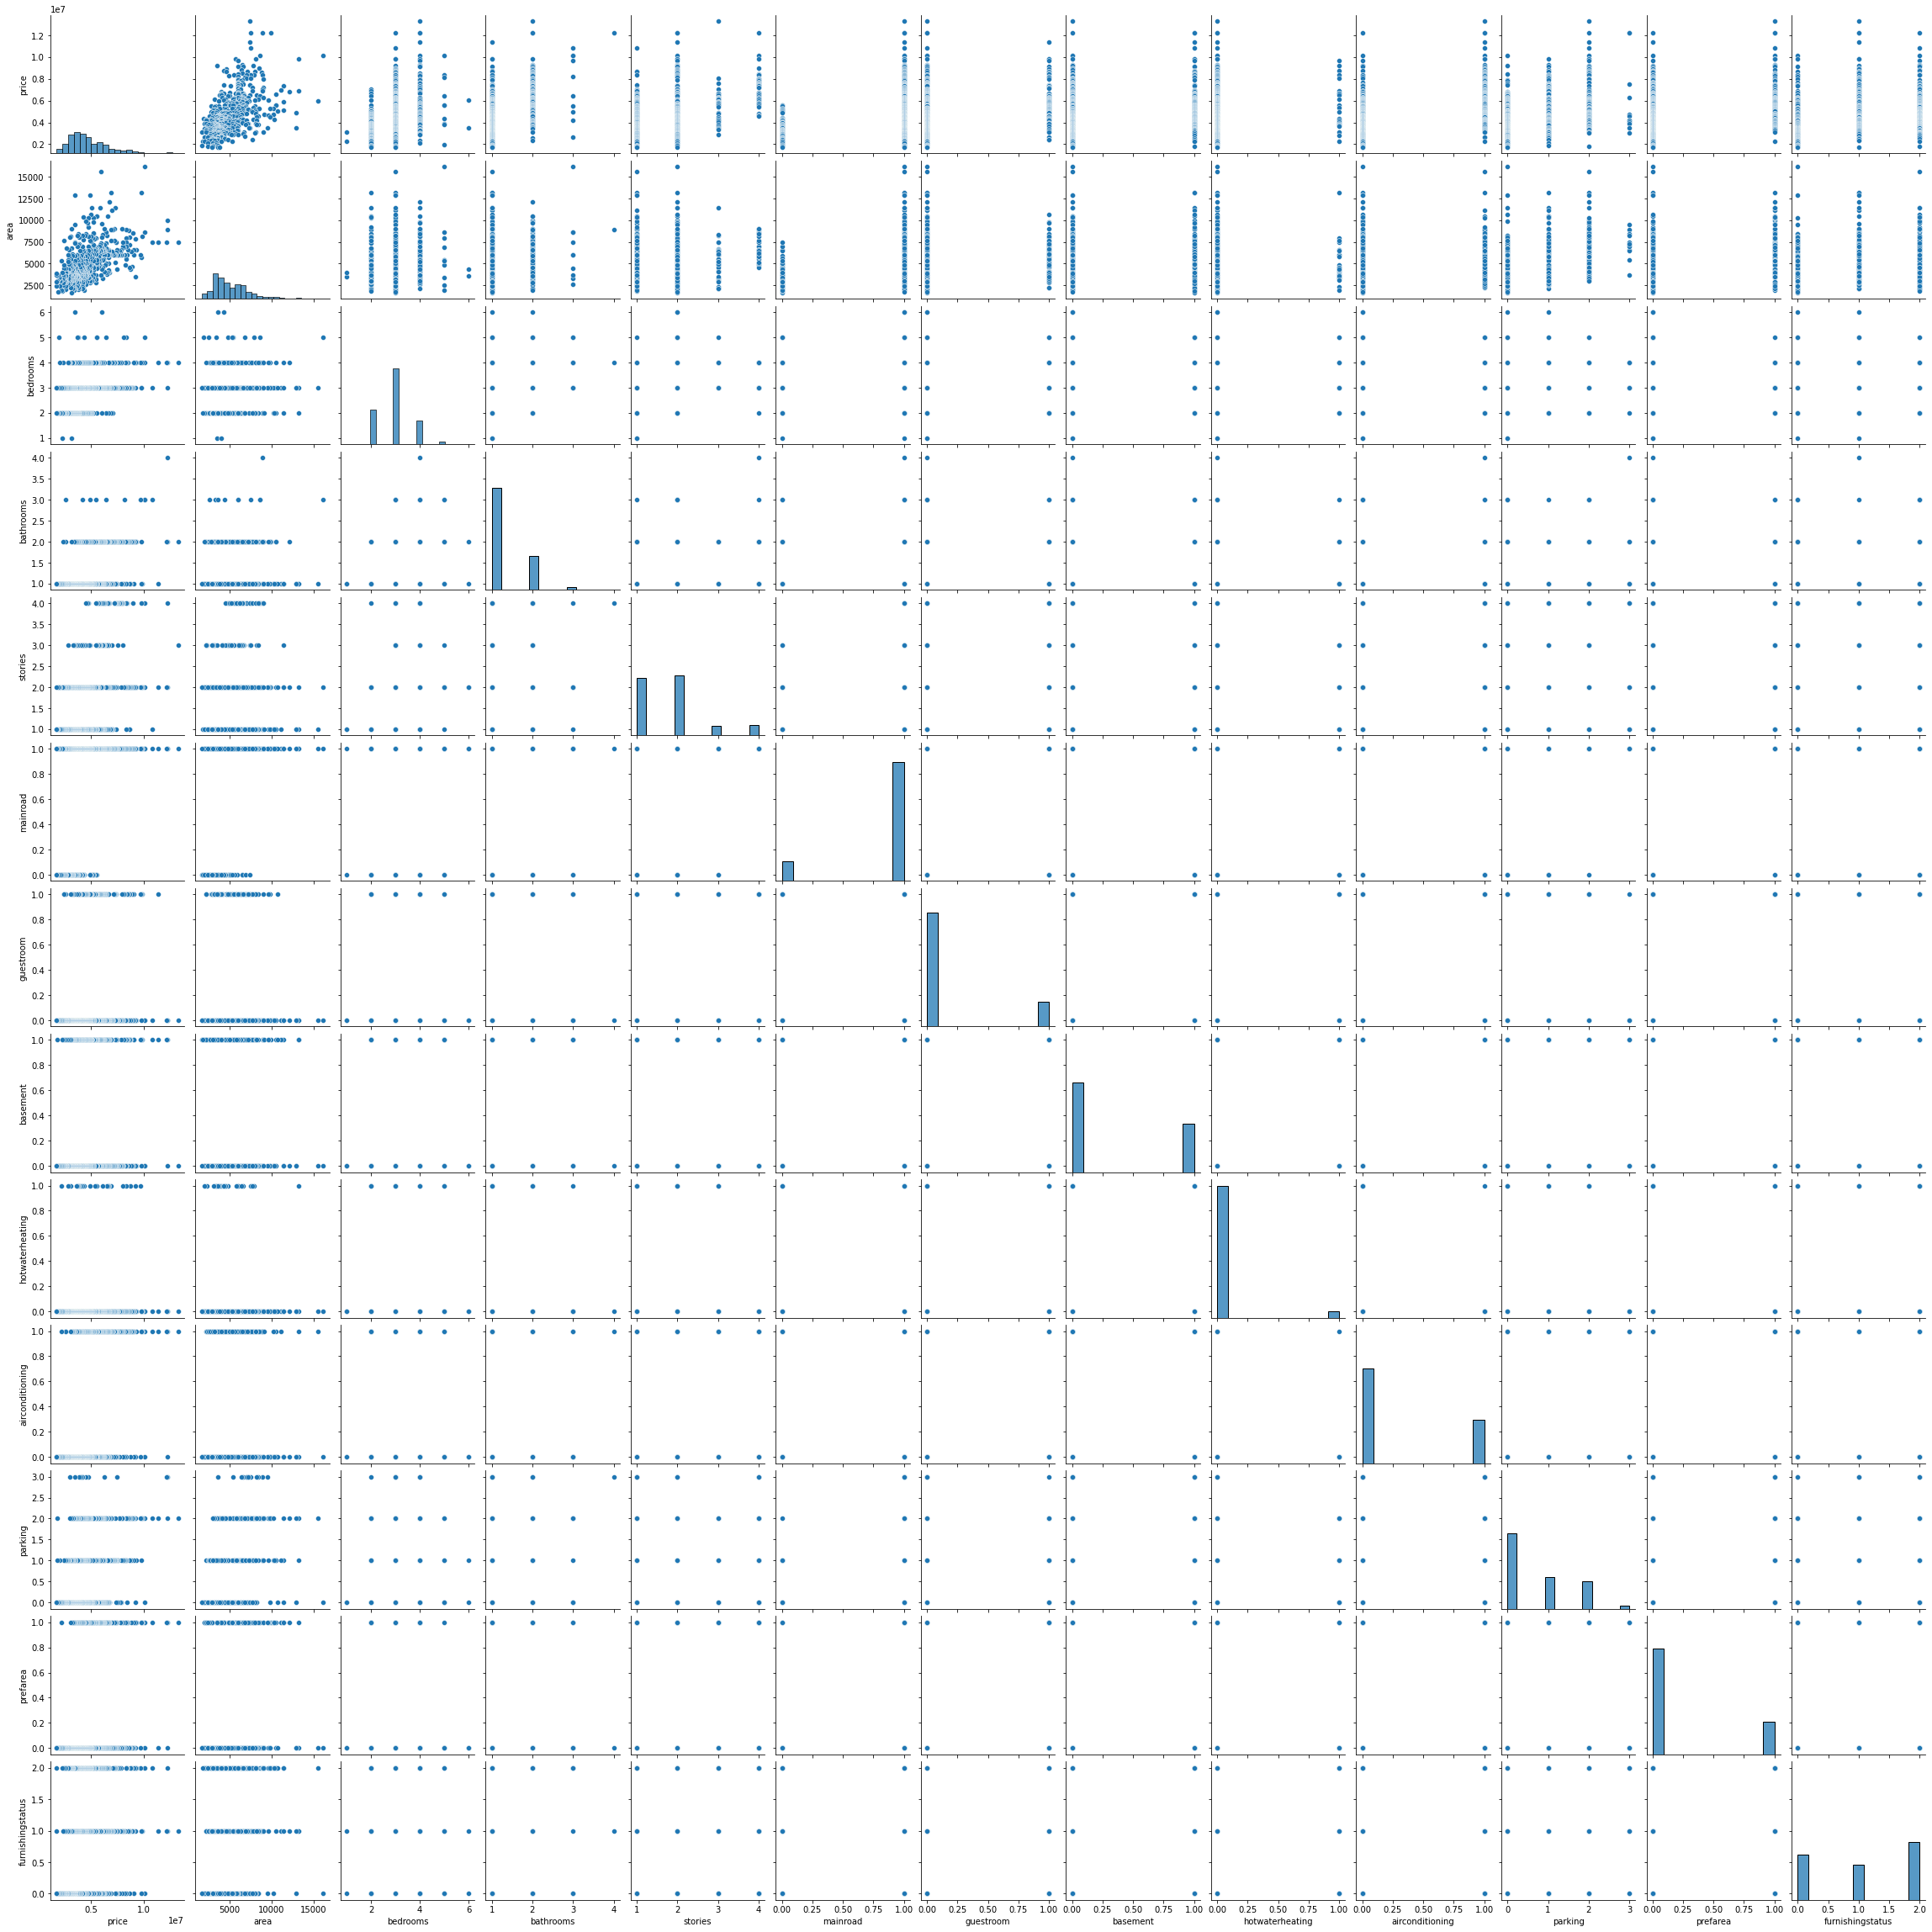

In [ ]:
sns.pairplot(df)

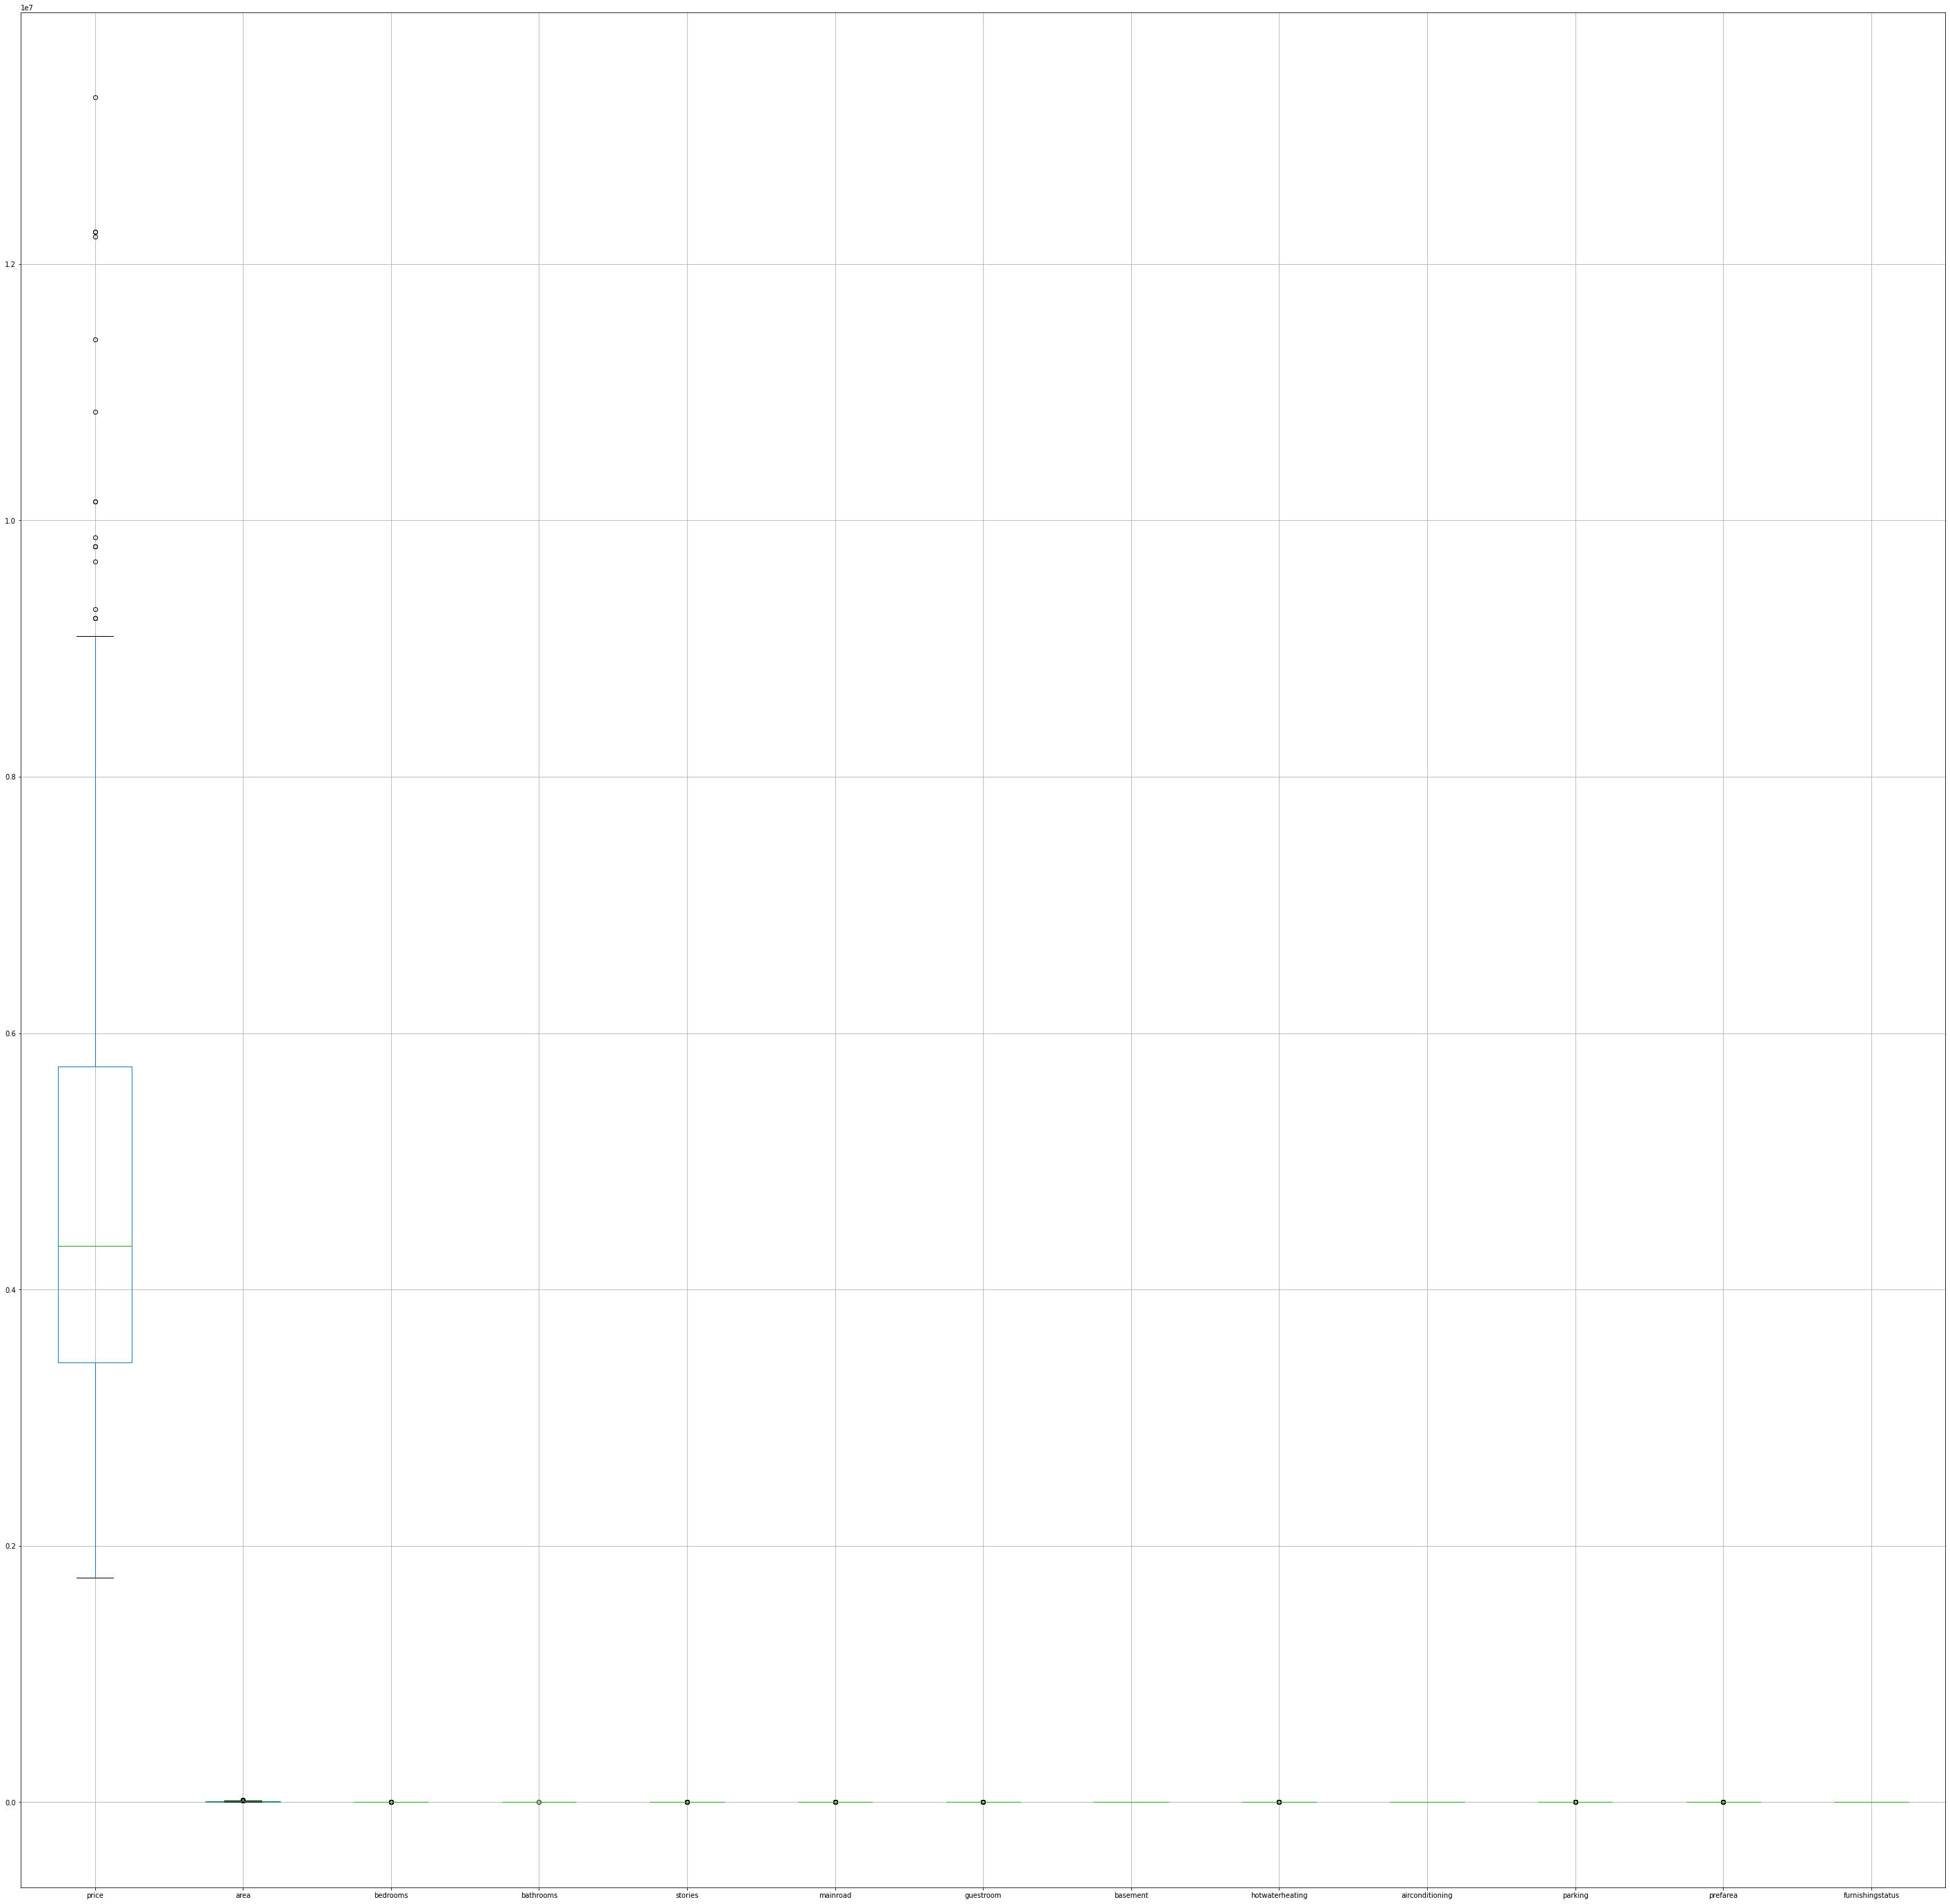

In [ ]:
plt.figure(figsize=(50,50))
df.boxplot()

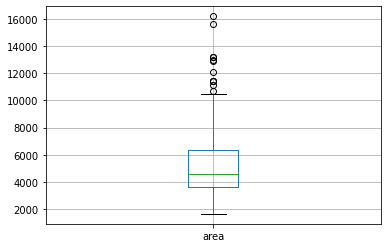

In [ ]:
df[['area']].boxplot()

In [ ]:
  #  if you remove the outliers then we use z test
  # iteration of i means all data points
#   z = (data(i) - mean(area))/standard deviation(area)

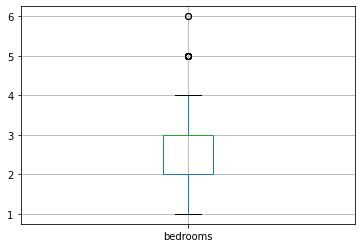

In [ ]:
df[['bedrooms']].boxplot()

In [ ]:
# how many values are there where bedrooms is more than 4
len(df.bedrooms.loc[df.bedrooms >4])

12

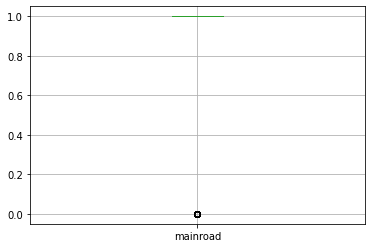

In [ ]:
df[['mainroad']].boxplot()

In [ ]:
len(df.mainroad.loc[df.mainroad == 0])

77

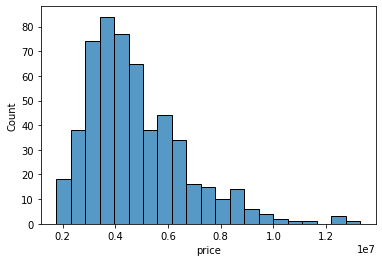

In [ ]:
sns.histplot(df.price)

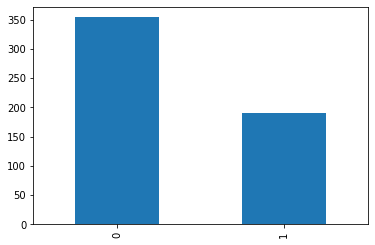

In [ ]:
# show the strght of 2 variables
df.basement.value_counts().plot.bar()

In [ ]:
# Show all the prices of a houses where bedrooms are 4 and bathroom are 2

df.loc[df.bedrooms == 4, ['price', 'bedrooms', 'bathrooms']][df.bathrooms==2]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,bedrooms,bathrooms
0,13300000,4,2
3,12215000,4,2
12,9310000,4,2
13,9240000,4,2
16,9100000,4,2
25,8540000,4,2
29,8400000,4,2
32,8295000,4,2
37,7980000,4,2
39,7910000,4,2


# Spliting the dataset

In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1


In [ ]:
X = df.iloc[:,1:]
y = df.price

In [ ]:
df.price.ndim

1

In [ ]:
df.iloc[:,1:].ndim

2

In [ ]:
X_train, X_test , y_train , y_test =train_test_split(X,y,test_size=0.2 , random_state=42)

In [ ]:
len(X_train)

436

In [ ]:
len(X_test)

109

In [ ]:
len(y_train)

436

In [ ]:
len(y_test)

109

# Choosing the model

In [ ]:
model = LinearRegression()

# Fitting/ Training the model

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# intercept value (cost/lost function)
model.intercept_

-153020.39767693914

In [ ]:
# coefficient Value
model.coef_

array([2.37359519e+02, 7.42382082e+04, 1.09878563e+06, 4.22818367e+05,
       3.99602240e+05, 2.36368961e+05, 4.13764911e+05, 6.96228583e+05,
       8.14587673e+05, 2.37846833e+05, 6.34405791e+05, 1.26914419e+05])

In [ ]:
# y = c + m1x1 + m2x2+ ......+mnxn # for multvalues

# Prediction

In [ ]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [ ]:
pred_y = model.predict(X_test)

In [ ]:
pred_y

array([5239173.32762718, 7054067.57583382, 3129423.54574214,
       4668932.93211896, 3057758.57376511, 3585956.42796038,
       5430399.31975463, 6182620.74176088, 2760320.64728725,
       2359083.3399644 , 9746225.66150697, 2850434.59951216,
       3214625.09528042, 3417524.84438337, 3769801.02852143,
       5309671.85335955, 3068028.49401721, 4890310.44714619,
       4453883.75758458, 3594648.20323524, 5899893.81059038,
       5963835.34944124, 2782787.13656036, 4838071.49471231,
       5330250.73959906, 7654298.4678318 , 3300237.03688317,
       5001631.29984533, 8012230.93813926, 3178473.5945452 ,
       6578529.7401813 , 3392127.35949438, 6537350.98622346,
       4237680.8829526 , 3621348.73870716, 5910621.58319737,
       4896147.52750411, 4471112.88912377, 3231897.01884388,
       4375178.05890928, 4614551.92546614, 3592864.9782568 ,
       7035078.81430349, 3775390.05875499, 3772667.84258209,
       4365957.52699338, 6850714.81147478, 4080980.8739274 ,
       3827406.38024767,

In [ ]:
newdf2 = pd.DataFrame({'Actual Value':y_test, 'predicted Value':pred_y})

In [ ]:
newdf2

,Actual Value,predicted Value
316,4060000,5.239173e+06
77,6650000,7.054068e+06
360,3710000,3.129424e+06
90,6440000,4.668933e+06
493,2800000,3.057759e+06
...,...,...
15,9100000,5.055402e+06
357,3773000,4.098018e+06
39,7910000,7.162800e+06
54,7350000,6.479294e+06


Text(0.5, 1.0, 'Actual v/s Predicted')

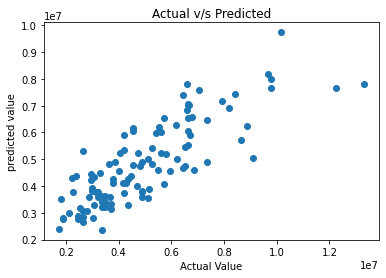

In [ ]:
plt.scatter(newdf2['Actual Value'],newdf2['predicted Value'])
plt.xlabel('Actual Value')
plt.ylabel('predicted value')
plt.title('Actual v/s Predicted')

In [ ]:
# Strength
newdf2.corr()

,Actual Value,predicted Value
Actual Value,1.000000,0.822513
predicted Value,0.822513,1.000000


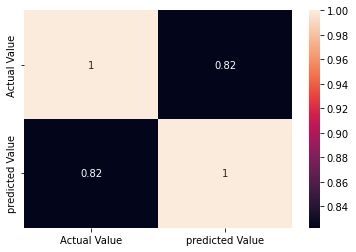

In [ ]:
sns.heatmap(newdf2.corr(),annot=True)

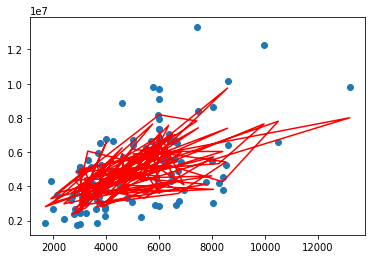

In [ ]:
# Try to do that in simple linear regression
plt.scatter(X_test.area , y_test)
plt.plot(X_test.area , pred_y, color='red')

In [ ]:
# model.predict([[__, __, __, ___]])
# you can predict values by putting these values of features 
# and you will find the price of that house

# Testing the model performance


In [ ]:
r2_score(y_test, pred_y)

0.6542221839581839